# Candidate Number: A12988

## Part 2 (c) 
*"In this task, we are required to find "fit a logistic regression model for the probability of diverted US flights using as many features as possible from attributes of the departure date, the sched- uled departure and arrival times, the coordinates and distance between departure and planned arrival airports, and the carrier. Visualize the coefficients across years."*


- ***"Loaded flight data for each year from 1998 to 2007 and supplementary airport data."***
- ***"Merged flight data with airport data to obtain latitude and longitude information."***
- ***"Selected relevant columns for analysis, including time, day, distance, and diversion status."***

***Data Processing:***

- ***"Iterated over each year from 1998 to 2007."***
- ***"Preprocessed flight data by handling missing values and converting time to appropriate formats."***
- ***"Scaled numerical features to ensure uniformity in the logistic regression model."***

***Logistic Regression Analysis:***

- ***"Trained logistic regression models for each year to predict flight diversions."***
- ***"Visualized coefficients of the logistic regression models to understand feature importance."***
- ***"Plotted the coefficients for each feature to observe trends across the years."***

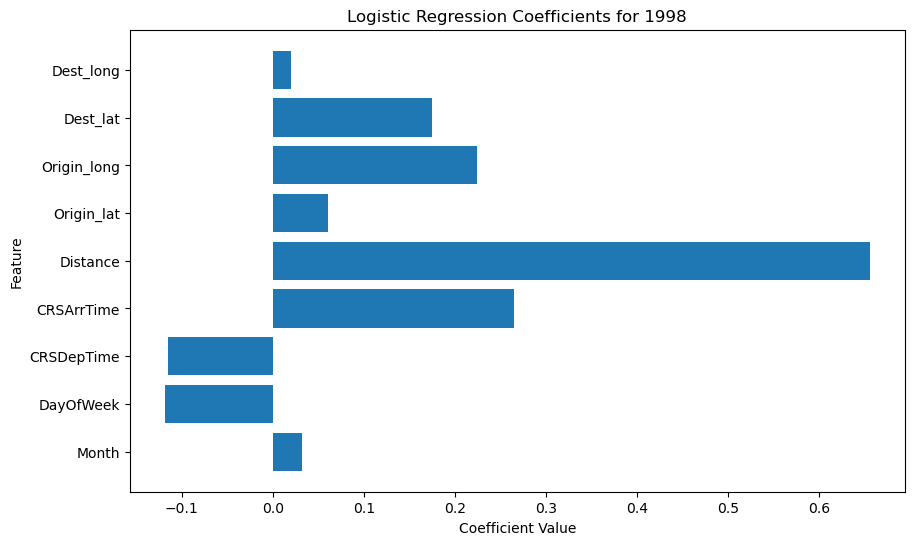

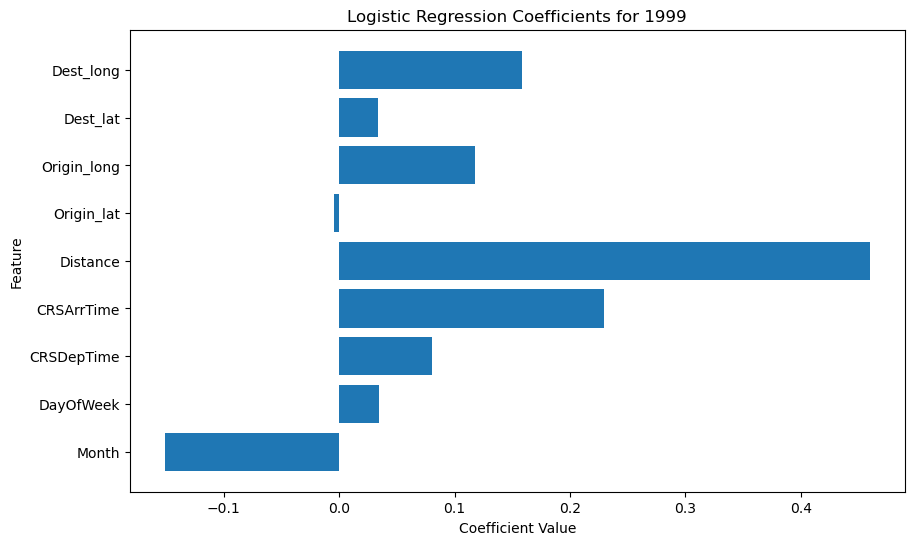

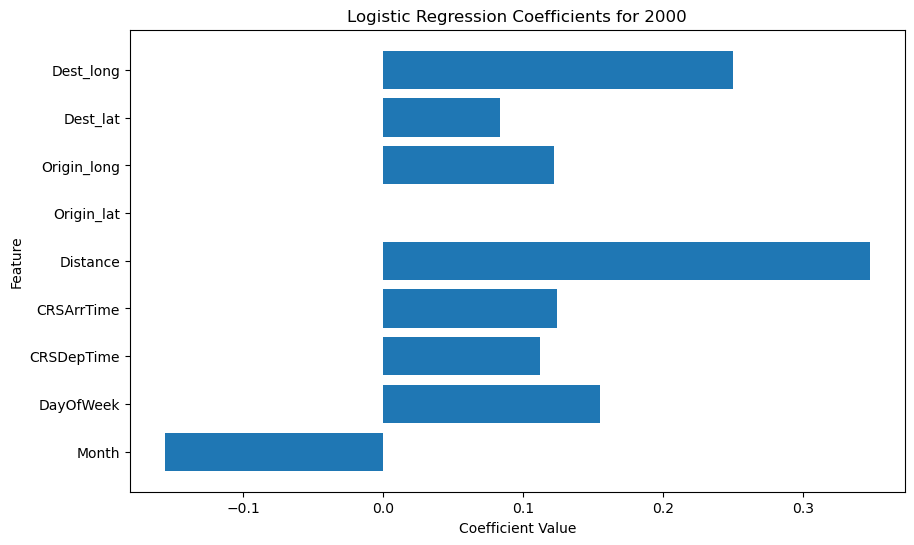

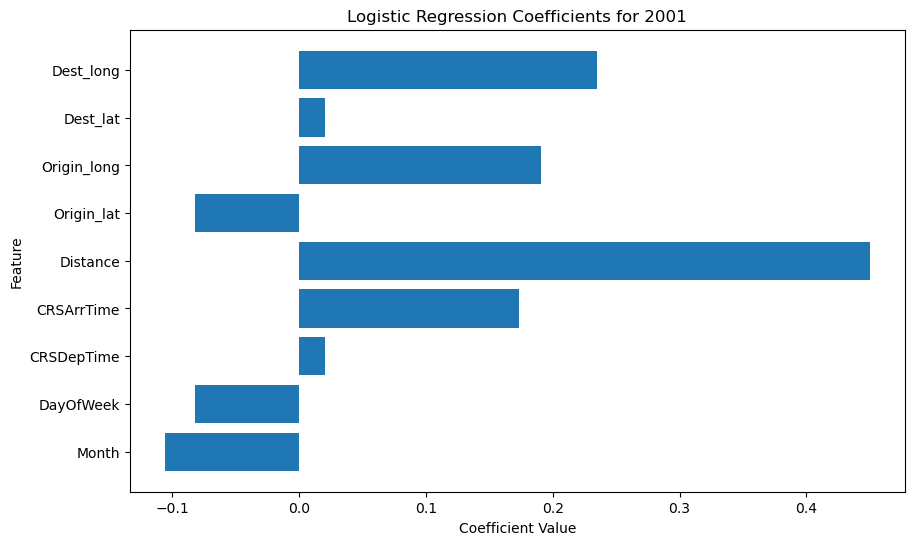

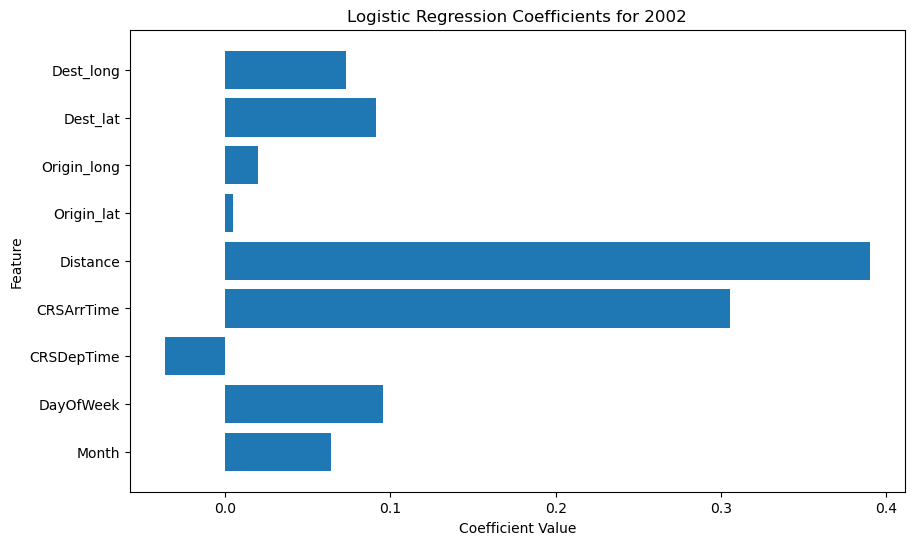

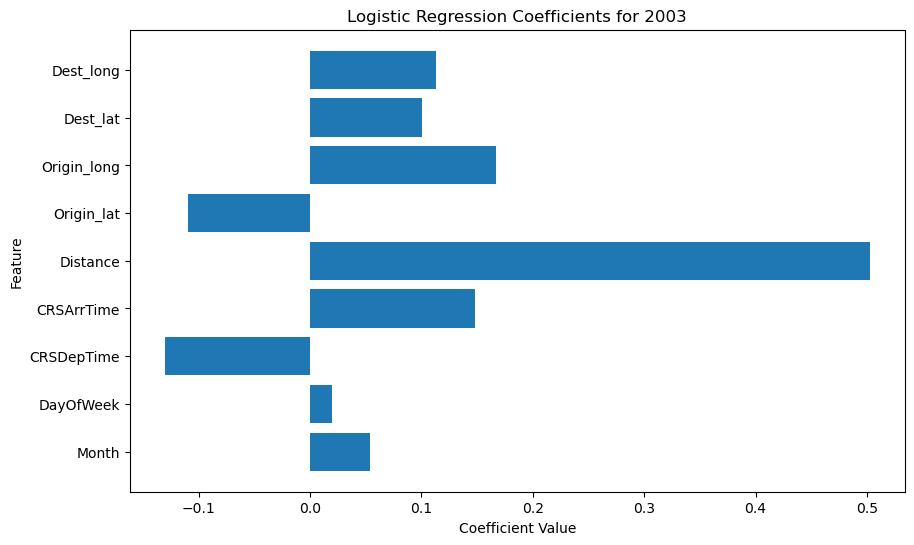

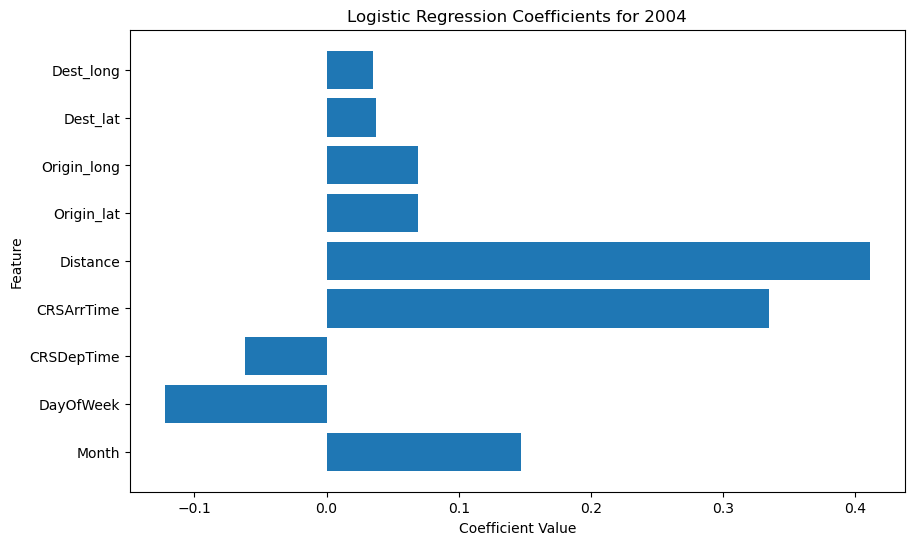

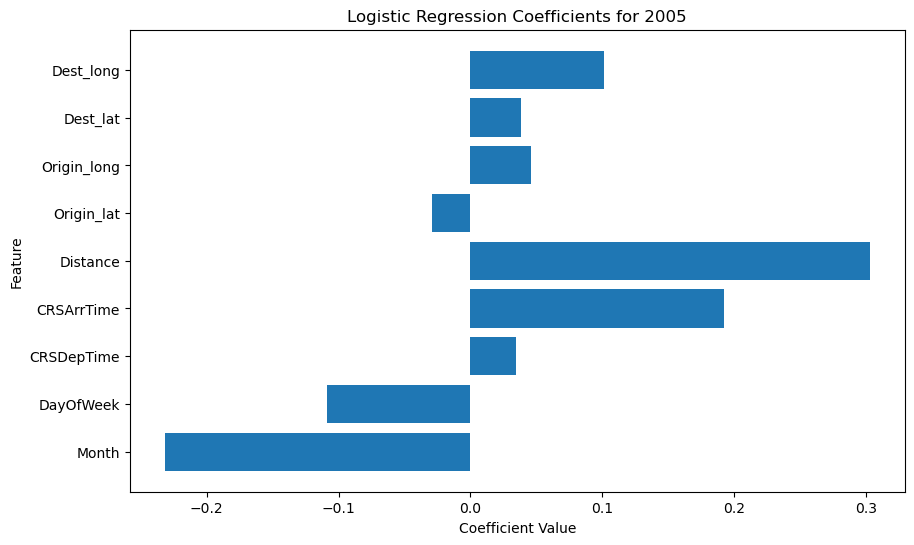

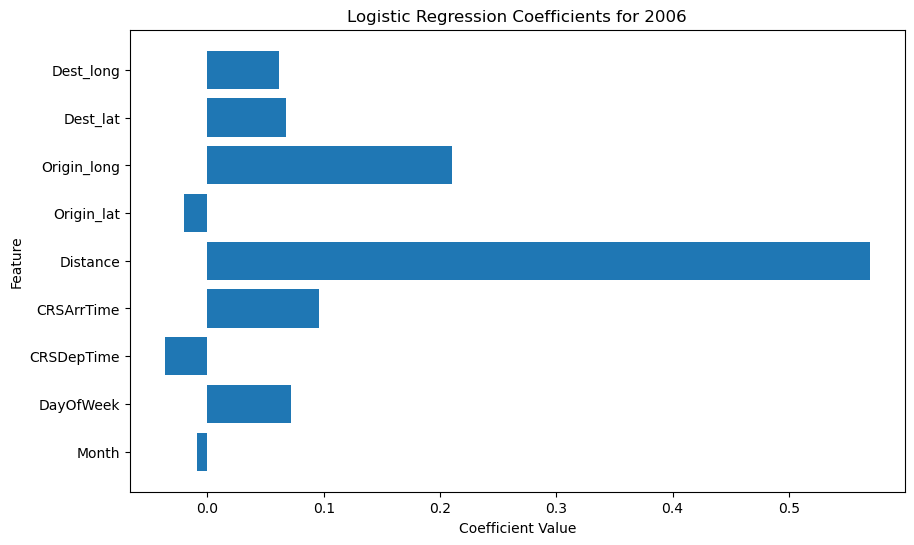

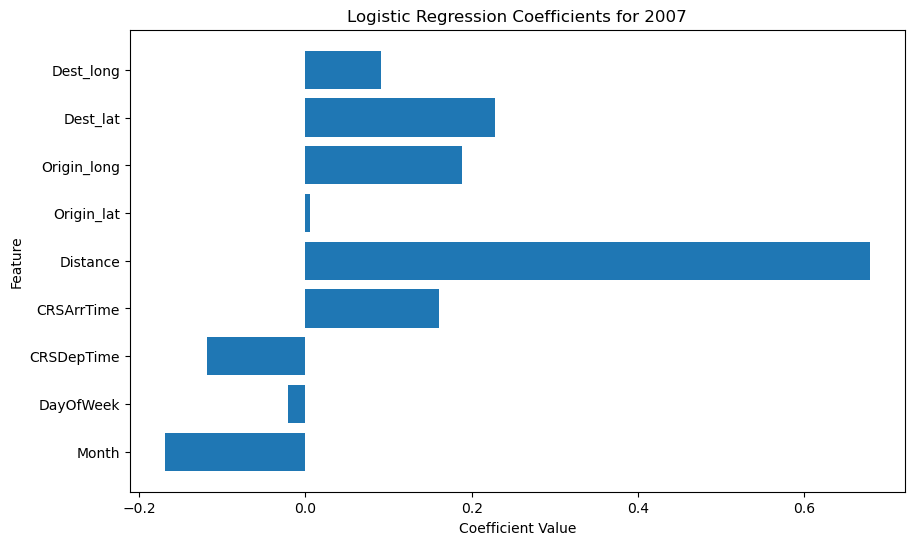

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the airport data
airports = pd.read_csv("/Users/macbookpro/Downloads/dataverse_files/airports.csv")

def process_year(year):
    # Load the flight data for the year
    df = pd.read_csv(f"/Users/macbookpro/Downloads/dataverse_files/{year}.csv", encoding='latin1', low_memory=False)

    # Filter for a specific carrier (US)
    flight_data_2 = df[df['UniqueCarrier'] == 'US']

    # Merge with airports data to get latitude and longitude for Origin and Dest
    flight_data_2 = flight_data_2.merge(airports, left_on='Origin', right_on='iata', how='left').rename(columns={'lat': 'Origin_lat', 'long': 'Origin_long'})
    flight_data_2 = flight_data_2.merge(airports, left_on='Dest', right_on='iata', how='left').rename(columns={'lat': 'Dest_lat', 'long': 'Dest_long'})

    # Select and clean relevant columns
    columns_to_use = ['Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Origin_lat', 'Origin_long', 'Dest_lat', 'Dest_long', 'Diverted']
    flight_data_2 = flight_data_2[columns_to_use]
    flight_data_2.dropna(inplace=True)

    # Define features and target variable
    X = flight_data_2.drop('Diverted', axis=1)
    y = flight_data_2['Diverted']

    # Preprocessing and model training
    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), X.columns)])
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)

    # Plotting coefficients
    coefs = clf.named_steps['classifier'].coef_[0]
    features = X.columns
    plt.figure(figsize=(10, 6))
    plt.barh(features, coefs)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Logistic Regression Coefficients for {year}')
    plt.show()

# Process and plot for each year from 1998 to 2007
for year in range(1998, 2008):
    process_year(year)